In [1]:
!git init
!git config --global user.email 'ylgiraldoe@uqvirtual.edu.co'
!git config --global user.name 'Yeicko10'
from getpass import getpass
password = getpass('1094923518Yeicko')


Reinitialized existing Git repository in C:/Users/Usuario1/Desktop/Parcial1/.git/
1094923518Yeicko········


In [2]:
!pip3 install pandas
!pip3 install numpy 
!pip3 install matplotlib
!pip3 install plotly
!pip3 install datetime
!pip3 install json
!pip3 install requests
!pip3 install statsmodels
!pip3 install scipy
!pip3 install seaborn

  Using cached matplotlib-3.6.1-cp39-cp39-win_amd64.whl (7.2 MB)


ERROR: Could not find a version that satisfies the requirement json (from versions: none)
ERROR: No matching distribution found for json



  Using cached seaborn-0.12.1-py3-none-any.whl (288 kB)
  Using cached matplotlib-3.6.0-cp39-cp39-win_amd64.whl (7.2 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.1
    Uninstalling matplotlib-3.6.1:
      Successfully uninstalled matplotlib-3.6.1


In [3]:
import pandas as pd
import plotly.express as px
import datetime 
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
from scipy.stats import chi2_contingency
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import seaborn as sns



In [76]:
from scipy.stats import ttest_ind

In [28]:
df = pd.read_csv("search2.csv")
df

,Planet_Name,SNR_Emission_15_micron,SNR_Emission_5_micron,SNR_Transmission_K_mag,Rp,Mp,Tday,Teq,log10g_p,Period,Transit_Duration,K_mag,Distance,Teff,log10g_s,Transit_Flag,Catalog_Name
0,Kepler-1697 b,0.000,0.000,0.005,0.11,0.00668,526.0,442.0,3.121,33.4969,4.1110,11.2,247.77,4682.0,4.54,True,nexsci
1,CoRoT-10 b,0.000,0.013,0.007,0.97,2.75000,796.0,670.0,3.860,13.2406,2.9800,11.8,338.39,5075.0,4.65,True,nexsci
2,CoRoT_14,0.057,0.024,0.001,1.09,7.60000,2317.0,1948.0,4.200,1.5121,1.6620,13.8,1744.60,6035.0,4.35,True,nexsci
3,CoRoT_18,0.082,0.062,0.010,1.31,3.47000,1816.0,1527.0,3.700,1.9001,2.3870,13.0,764.89,5440.0,4.40,True,nexsci
4,CoRoT-20 b,0.001,0.009,0.002,0.84,4.30000,1135.0,955.0,4.179,9.2429,2.2248,12.5,844.06,5880.0,4.35,True,nexsci
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3913,TOI-2570 b,0.107,0.108,0.080,1.22,0.82000,1697.0,1427.0,3.137,2.9888,3.0065,10.9,361.86,5771.0,4.38,True,nexsci
3914,TOI-2196 b,0.028,0.012,0.018,0.31,0.08181,2204.0,1854.0,3.316,1.1947,1.5040,10.3,259.95,5634.0,4.42,True,nexsci
3915,TOI-1820 b,0.075,0.087,0.022,1.14,2.30000,1636.0,1376.0,3.642,4.8607,2.9200,9.5,248.50,5734.0,4.24,True,nexsci
3916,TOI-712 d,0.000,0.000,0.049,0.22,0.02100,372.0,313.0,3.028,84.8396,5.7020,8.3,58.62,4622.0,4.65,True,nexsci


In [29]:
df.isnull().sum()

Planet_Name                 0
SNR_Emission_15_micron    309
SNR_Emission_5_micron     309
SNR_Transmission_K_mag    311
Rp                          1
Mp                          0
Tday                      220
Teq                       141
log10g_p                    1
Period                      0
Transit_Duration          160
K_mag                       5
Distance                   11
Teff                        2
log10g_s                    3
Transit_Flag                0
Catalog_Name                0
dtype: int64

In [94]:
df.describe()

,SNR_Emission_15_micron,SNR_Emission_5_micron,SNR_Transmission_K_mag,Rp,Mp,Tday,Teq,log10g_p,Period,Transit_Duration,K_mag,Distance,Teff,log10g_s
count,3609.000000,3609.000000,3607.000000,3917.000000,3918.000000,3698.000000,3777.000000,3917.000000,3918.000000,3758.000000,3913.000000,3907.000000,3916.000000,3915.000000
mean,0.035519,0.021591,0.028275,0.365262,0.614568,1146.441320,964.168388,3.109199,25.674664,3.903461,11.786967,651.956903,5432.938968,4.447752
std,0.197886,0.077034,0.070472,0.394255,6.250135,538.990879,454.137091,0.319461,91.232891,2.644346,1.744118,505.913653,770.587998,0.228840
min,0.000000,0.000000,0.000000,0.030000,0.000090,177.000000,149.000000,1.574000,0.179700,0.133300,3.300000,6.530000,2566.000000,2.950000
25%,0.000000,0.000000,0.004000,0.140000,0.010200,740.250000,623.000000,3.003000,3.926050,2.271325,10.800000,283.350000,5088.750000,4.325000
50%,0.000000,0.001000,0.007000,0.210000,0.020300,1051.500000,884.000000,3.050000,8.623900,3.250000,12.200000,562.120000,5611.500000,4.470000
75%,0.001000,0.002000,0.018000,0.320000,0.046700,1437.000000,1208.000000,3.103000,20.305625,4.761500,13.100000,914.220000,5938.000000,4.580000
max,5.101000,1.544000,1.423000,2.100000,144.000000,4815.000000,4049.000000,5.582000,3650.000000,53.600000,15.500000,8500.000000,10170.000000,7.920000


In [95]:
df.head()

,Planet_Name,SNR_Emission_15_micron,SNR_Emission_5_micron,SNR_Transmission_K_mag,Rp,Mp,Tday,Teq,log10g_p,Period,Transit_Duration,K_mag,Distance,Teff,log10g_s,Transit_Flag,Catalog_Name
0,Kepler-1697 b,0.000,0.000,0.005,0.11,0.00668,526.0,442.0,3.121,33.4969,4.1110,11.2,247.77,4682.0,4.54,True,nexsci
1,CoRoT-10 b,0.000,0.013,0.007,0.97,2.75000,796.0,670.0,3.860,13.2406,2.9800,11.8,338.39,5075.0,4.65,True,nexsci
2,CoRoT_14,0.057,0.024,0.001,1.09,7.60000,2317.0,1948.0,4.200,1.5121,1.6620,13.8,1744.60,6035.0,4.35,True,nexsci
3,CoRoT_18,0.082,0.062,0.010,1.31,3.47000,1816.0,1527.0,3.700,1.9001,2.3870,13.0,764.89,5440.0,4.40,True,nexsci
4,CoRoT-20 b,0.001,0.009,0.002,0.84,4.30000,1135.0,955.0,4.179,9.2429,2.2248,12.5,844.06,5880.0,4.35,True,nexsci


In [8]:
df.shape

(3918, 17)

In [9]:
type(df)

pandas.core.frame.DataFrame

In [31]:
df.isnull()

,Planet_Name,SNR_Emission_15_micron,SNR_Emission_5_micron,SNR_Transmission_K_mag,Rp,Mp,Tday,Teq,log10g_p,Period,Transit_Duration,K_mag,Distance,Teff,log10g_s,Transit_Flag,Catalog_Name
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3913,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3914,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3915,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3916,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [115]:
dff=df.dropna()
dff

,Planet_Name,SNR_Emission_15_micron,SNR_Emission_5_micron,SNR_Transmission_K_mag,Rp,Mp,Tday,Teq,log10g_p,Period,Transit_Duration,K_mag,Distance,Teff,log10g_s,Transit_Flag,Catalog_Name
0,Kepler-1697 b,0.000,0.000,0.005,0.11,0.00668,526.0,442.0,3.121,33.4969,4.1110,11.2,247.77,4682.0,4.54,True,nexsci
1,CoRoT-10 b,0.000,0.013,0.007,0.97,2.75000,796.0,670.0,3.860,13.2406,2.9800,11.8,338.39,5075.0,4.65,True,nexsci
2,CoRoT_14,0.057,0.024,0.001,1.09,7.60000,2317.0,1948.0,4.200,1.5121,1.6620,13.8,1744.60,6035.0,4.35,True,nexsci
3,CoRoT_18,0.082,0.062,0.010,1.31,3.47000,1816.0,1527.0,3.700,1.9001,2.3870,13.0,764.89,5440.0,4.40,True,nexsci
4,CoRoT-20 b,0.001,0.009,0.002,0.84,4.30000,1135.0,955.0,4.179,9.2429,2.2248,12.5,844.06,5880.0,4.35,True,nexsci
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3913,TOI-2570 b,0.107,0.108,0.080,1.22,0.82000,1697.0,1427.0,3.137,2.9888,3.0065,10.9,361.86,5771.0,4.38,True,nexsci
3914,TOI-2196 b,0.028,0.012,0.018,0.31,0.08181,2204.0,1854.0,3.316,1.1947,1.5040,10.3,259.95,5634.0,4.42,True,nexsci
3915,TOI-1820 b,0.075,0.087,0.022,1.14,2.30000,1636.0,1376.0,3.642,4.8607,2.9200,9.5,248.50,5734.0,4.24,True,nexsci
3916,TOI-712 d,0.000,0.000,0.049,0.22,0.02100,372.0,313.0,3.028,84.8396,5.7020,8.3,58.62,4622.0,4.65,True,nexsci


In [97]:
#Aquí se planteo la regresión lineal, tomando la banda-K como variable dependiente y el resto de datos como independientes
linear_regression = smf.ols ("Teq ~ SNR_Emission_15_micron + SNR_Emission_5_micron + SNR_Transmission_K_mag + Rp + Mp + Tday + log10g_p + Period + Transit_Duration+ K_mag + Distance + Teff + log10g_s",
                            dff).fit()

linear_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Teq   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.979e+08
Date:                Mon, 24 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:22:42   Log-Likelihood:                -1583.4
No. Observations:                3587   AIC:                             3195.
Df Residuals:                    3573   BIC:                             3281.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.1103      0.269     -0.409      0.682      -0.639       0.418
SNR_Emission_15_micron    -0.0569      0.061     -0.938      0.348      -0.176       0.062
SNR_Emission_5_micron      0.3259      0.198      1.649      0.099      -0.061       0.713
SNR_Transmission_K_mag    -0.1450      0.140     -1.035      0.301      -0.420       0.130
Rp                        -0.0172      0.024     -0.717      0.473      -0.064       0.030
Mp                         0.0002      0.001      0.194      0.846      -0.002       0.002
Tday                       0.8409   1.95e-05    4.3e+04      0.000       0.841       0.841
log10g_p                  -0.0169      0.024     -0.717      0.474      -0.063       0.029
Period                    -0.0002      0.000     -2.205      0.028      -0.000   -2.59e-05
Transit_Duration           0.0093      0.004      2.119      0.034       0.001       0.018
K_mag                     -0.0021      0.007     -0.312      0.755      -0.015       0.011
Distance                3.403e-06   2.47e-05      0.138      0.890    -4.5e-05    5.18e-05
Teff                   -4.428e-06   1.35e-05     -0.329      0.742   -3.08e-05     2.2e-05
log10g_s                   0.0383      0.048      0.806      0.421      -0.055       0.132
==============================================================================
Omnibus:                      102.925   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.041
Skew:                          -0.009   Prob(JB):                     1.36e-11
Kurtosis:                       2.422   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

array([[<AxesSubplot: title={'center': 'SNR_Emission_15_micron'}>,
        <AxesSubplot: title={'center': 'SNR_Emission_5_micron'}>,
        <AxesSubplot: title={'center': 'SNR_Transmission_K_mag'}>,
        <AxesSubplot: title={'center': 'Rp'}>],
       [<AxesSubplot: title={'center': 'Mp'}>,
        <AxesSubplot: title={'center': 'Tday'}>,
        <AxesSubplot: title={'center': 'Teq'}>,
        <AxesSubplot: title={'center': 'log10g_p'}>],
       [<AxesSubplot: title={'center': 'Period'}>,
        <AxesSubplot: title={'center': 'Transit_Duration'}>,
        <AxesSubplot: title={'center': 'K_mag'}>,
        <AxesSubplot: title={'center': 'Distance'}>],
       [<AxesSubplot: title={'center': 'Teff'}>,
        <AxesSubplot: title={'center': 'log10g_s'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

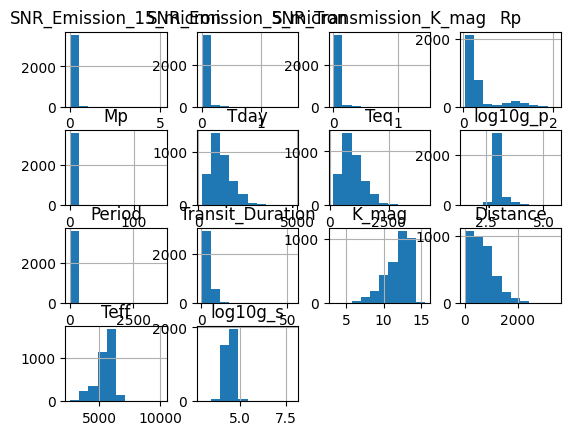

In [98]:
dff.hist()

In [117]:
cordf = df.corr(method='pearson')
cordf

C:\Users\Usuario1\AppData\Local\Temp\ipykernel_5820\2864979508.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cordf = df.corr(method='pearson')


,SNR_Emission_15_micron,SNR_Emission_5_micron,SNR_Transmission_K_mag,Rp,Mp,Tday,Teq,log10g_p,Period,Transit_Duration,K_mag,Distance,Teff,log10g_s,Transit_Flag
SNR_Emission_15_micron,1.000000,0.829919,0.397515,0.495798,0.070537,0.425488,0.424749,0.088472,-0.047696,-0.041447,-0.269477,-0.135160,0.253222,-0.184166,NaN
SNR_Emission_5_micron,0.829919,1.000000,0.612213,0.667863,0.084567,0.428735,0.427978,0.104489,-0.070942,-0.075887,-0.382096,-0.218841,0.205819,-0.189151,NaN
SNR_Transmission_K_mag,0.397515,0.612213,1.000000,0.494532,-0.008638,0.193441,0.193078,-0.184219,-0.061908,-0.063603,-0.499099,-0.305066,-0.016962,-0.076203,NaN
Rp,0.495798,0.667863,0.494532,1.000000,0.221372,0.420468,0.422248,0.155234,0.035010,0.062896,-0.256359,-0.067080,0.276918,-0.356412,NaN
Mp,0.070537,0.084567,-0.008638,0.221372,1.000000,0.115908,0.115301,0.423845,0.018766,0.016419,-0.001443,0.047907,0.084969,-0.062283,NaN
Tday,0.425488,0.428735,0.193441,0.420468,0.115908,1.000000,1.000000,0.116300,-0.287348,-0.311917,-0.183438,0.023868,0.456879,-0.452184,NaN
Teq,0.424749,0.427978,0.193078,0.422248,0.115301,1.000000,1.000000,0.117359,-0.285180,-0.308296,-0.182709,0.025018,0.455257,-0.453544,NaN
log10g_p,0.088472,0.104489,-0.184219,0.155234,0.423845,0.116300,0.117359,1.000000,0.025674,-0.041066,-0.097236,-0.043867,0.017173,0.006225,NaN
Period,-0.047696,-0.070942,-0.061908,0.035010,0.018766,-0.287348,-0.285180,0.025674,1.000000,0.622055,0.033954,0.061949,0.045036,-0.089757,NaN
Transit_Duration,-0.041447,-0.075887,-0.063603,0.062896,0.016419,-0.311917,-0.308296,-0.041066,0.622055,1.000000,0.085114,0.311899,0.326352,-0.402016,NaN


In [99]:
dff.corr()

C:\Users\Usuario1\AppData\Local\Temp\ipykernel_5820\788259740.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dff.corr()


,SNR_Emission_15_micron,SNR_Emission_5_micron,SNR_Transmission_K_mag,Rp,Mp,Tday,Teq,log10g_p,Period,Transit_Duration,K_mag,Distance,Teff,log10g_s,Transit_Flag
SNR_Emission_15_micron,1.000000,0.830217,0.396235,0.495439,0.070446,0.425620,0.425625,0.089133,-0.047688,-0.041535,-0.270072,-0.136439,0.253160,-0.183706,NaN
SNR_Emission_5_micron,0.830217,1.000000,0.610116,0.666981,0.084585,0.429260,0.429272,0.105798,-0.071016,-0.076001,-0.383022,-0.220954,0.205483,-0.188663,NaN
SNR_Transmission_K_mag,0.396235,0.610116,1.000000,0.491850,-0.008887,0.192440,0.192440,-0.183991,-0.061976,-0.063823,-0.500625,-0.305853,-0.018472,-0.075204,NaN
Rp,0.495439,0.666981,0.491850,1.000000,0.222528,0.426478,0.426477,0.151311,0.009988,0.056005,-0.285279,-0.126442,0.275355,-0.345170,NaN
Mp,0.070446,0.084585,-0.008887,0.222528,1.000000,0.117004,0.117002,0.428535,0.020522,0.015933,-0.005755,0.038809,0.086023,-0.062701,NaN
Tday,0.425620,0.429260,0.192440,0.426478,0.117004,1.000000,1.000000,0.118847,-0.284717,-0.312498,-0.190521,0.017711,0.458864,-0.456614,NaN
Teq,0.425625,0.429272,0.192440,0.426477,0.117002,1.000000,1.000000,0.118840,-0.284732,-0.312486,-0.190522,0.017717,0.458868,-0.456616,NaN
log10g_p,0.089133,0.105798,-0.183991,0.151311,0.428535,0.118847,0.118840,1.000000,0.029846,-0.040247,-0.109491,-0.092802,0.013767,0.011363,NaN
Period,-0.047688,-0.071016,-0.061976,0.009988,0.020522,-0.284717,-0.284732,0.029846,1.000000,0.625706,0.053858,0.063568,0.024458,-0.068125,NaN
Transit_Duration,-0.041535,-0.076001,-0.063823,0.056005,0.015933,-0.312498,-0.312486,-0.040247,0.625706,1.000000,0.093688,0.319074,0.322074,-0.397895,NaN


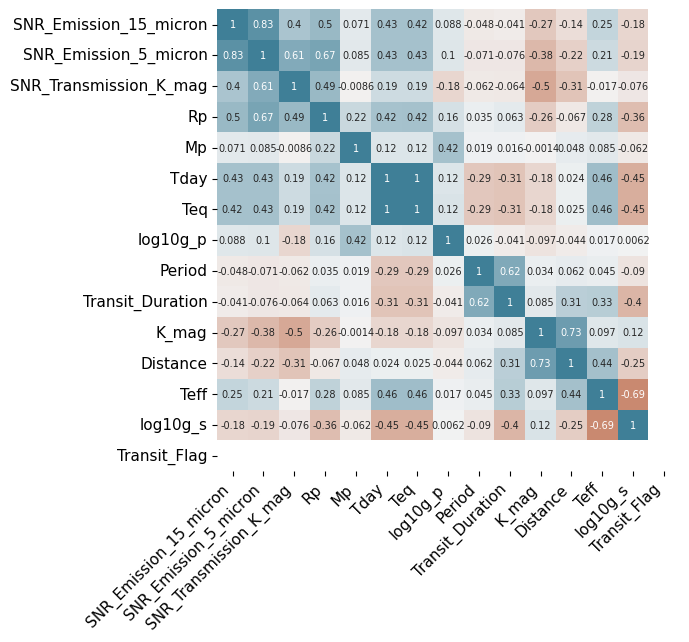

In [126]:
# Procedemos a graficar una matriz de correlación 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

sns.heatmap(
    cordf,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 7},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(25, 225, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 11)

In [100]:
dff.var()

C:\Users\Usuario1\AppData\Local\Temp\ipykernel_5820\623761516.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dff.var()


SNR_Emission_15_micron         0.039346
SNR_Emission_5_micron          0.005934
SNR_Transmission_K_mag         0.004969
Rp                             0.159187
Mp                            42.597197
Tday                      289903.448942
Teq                       204993.610292
log10g_p                       0.106402
Period                      6530.152733
Transit_Duration               7.082337
K_mag                          3.037188
Distance                  221585.353744
Teff                      587052.295728
log10g_s                       0.051053
Transit_Flag                   0.000000
dtype: float64

In [102]:
dff['Rp'].corr(dff['Mp'])

0.22252799218022373

In [103]:
#A partir de este momento haremos pruebas de significante A/B donde escogimos el Radio del planeta con la masa
# Ho: No hay relación entre el radio y la masa de los planetas
# Ha: Hay relación entre el radio y la masa de los planetas
col1 = dff.pop("Rp")
col2 = dff.pop("Mp")
print(col1)
print(col2)


0       0.11
1       0.97
2       1.09
3       1.31
4       0.84
        ... 
3913    1.22
3914    0.31
3915    1.14
3916    0.22
3917    1.77
Name: Rp, Length: 3587, dtype: float64
0       0.00668
1       2.75000
2       7.60000
3       3.47000
4       4.30000
         ...   
3913    0.82000
3914    0.08181
3915    2.30000
3916    0.02100
3917    0.94000
Name: Mp, Length: 3587, dtype: float64


In [104]:
alpha = 0.05
stat, p = ttest_ind(col1, col2)
print('t=%.3f, p=%.3f' % (stat, p))

if p > alpha:
    print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

t=-2.585, p=0.010
Reject the null hypothesis that the means are equal.


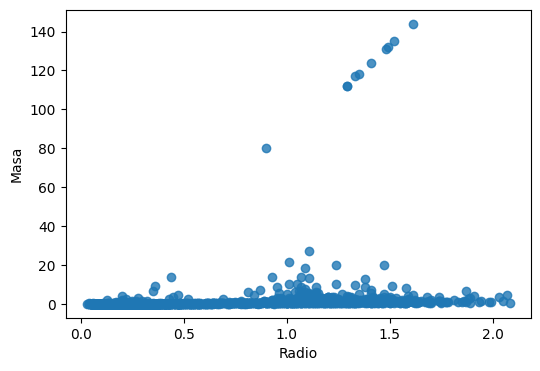

In [111]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(x=dff.Rp, y=dff.Mp, alpha= 0.8)
ax.set_xlabel('Radio')
ax.set_ylabel('Masa');

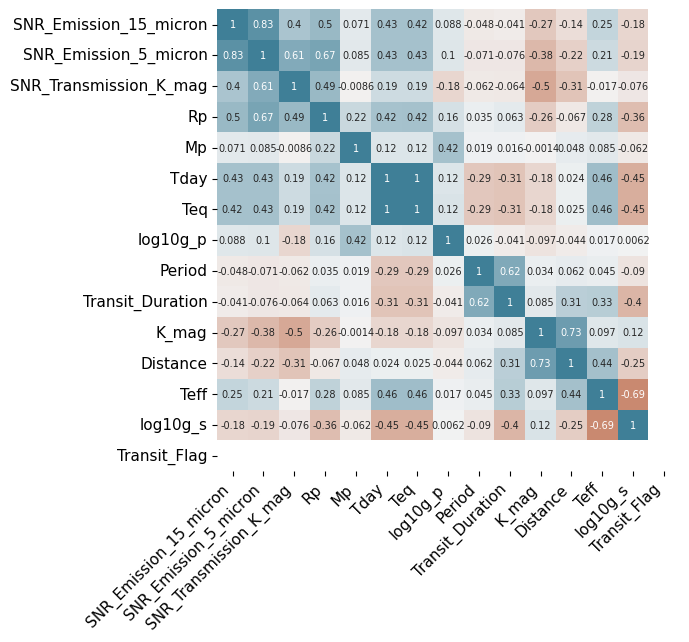

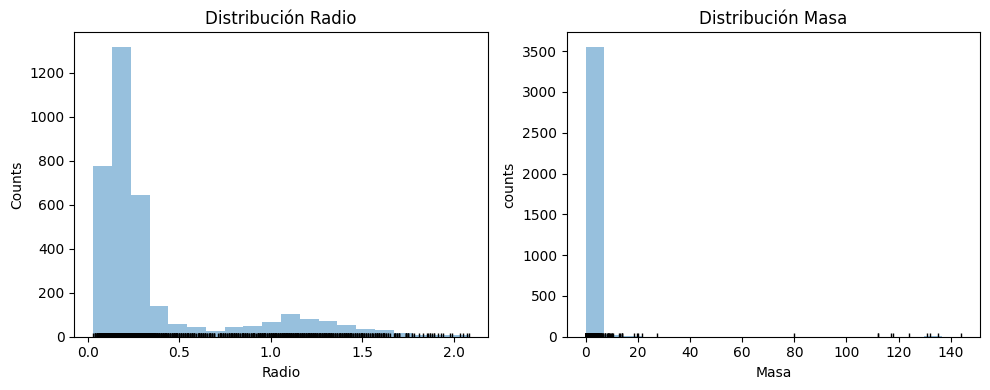

In [112]:
# Gráfico distribución variables
# ==============================================================================
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axs[0].hist(x=dff.Rp, bins=20, color="#3182bd", alpha=0.5)
axs[0].plot(dff.Rp, np.full_like(dff.Rp, -0.01), '|k', markeredgewidth=1)
axs[0].set_title('Distribución Radio')
axs[0].set_xlabel('Radio')
axs[0].set_ylabel('Counts')

axs[1].hist(x=dff.Mp, bins=20, color="#3182bd", alpha=0.5)
axs[1].plot(dff.Mp, np.full_like(dff.Mp, -0.01), '|k', markeredgewidth=1)
axs[1].set_title('Distribución Masa')
axs[1].set_xlabel('Masa')
axs[1].set_ylabel('counts')


plt.tight_layout();

In [ ]:
# En este apartado haremos la prueba anova
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].set_title('Teff vs Distance')
sns.boxplot(x="Distance", y="Teff", data=dff, ax=axs[0])
sns.swarmplot(x="Distance", y="Teff", data=dff, color='black',
              alpha = 0.5, ax=axs[0])

axs[1].set_title('Teff vs K_mag')
sns.boxplot(x="K_mag", y="Teff", data=dff, ax=axs[1])
sns.swarmplot(x="K_mag", y="Teff", data=dff, color='black',
              alpha = 0.5, ax=axs[1]);